<a href="https://colab.research.google.com/github/Rutujakhatal/Rutuja.ipynb/blob/main/Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [ ]:
# import csv file
df = pd.read_csv('/content/Festival Sales rk.csv',encoding= 'unicode_escape')

In [ ]:
df.shape

(11251, 17)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Quantity Sold,Unit Price,Total Sales,Customer Age
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,3.0,340.05,1020.15,41.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,4.0,205.25,821.00,31.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,7.0,61.01,427.07,45.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,2.0,211.79,423.58,62.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,2.0,188.78,377.56,54.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Quantity Sold     6000 non-null   float64
 14  Unit Price        6000 non-null   float64
 15  Total Sales       6000 non-null   float64
 16  Customer Age      6000 non-null   float6

In [ ]:
#drop unrelated/blank columns
#df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#check for null values
pd.isnull(df).sum()

User_ID                0
Cust_name              0
Product_ID             0
Gender                 0
Age Group              0
Age                    0
Marital_Status         0
State                  0
Zone                   0
Occupation             0
Product_Category       0
Orders                 0
Amount                12
Quantity Sold       5251
Unit Price          5251
Total Sales         5251
Customer Age        5251
dtype: int64

In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Quantity Sold', 'Unit Price', 'Total Sales',
       'Customer Age'],
      dtype='object')

In [ ]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount,Quantity Sold,Unit Price,Total Sales,Customer Age
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,3.0,340.05,1020.15,41.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,4.0,205.25,821.00,31.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,7.0,61.01,427.07,45.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,2.0,211.79,423.58,62.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,2.0,188.78,377.56,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1004124,Kastensmidt,P00282042,F,26-35,33,0,Gujarat,Western,Banking,Food,3,7987,5.0,429.89,2149.45,68.0
5996,1000872,Braun,P00117542,F,51-55,53,0,Gujarat,Western,Govt,Electronics & Gadgets,1,7987,9.0,496.78,4471.02,32.0
5997,1004250,Kalyani,P0096342,M,51-55,55,0,Haryana,Northern,Aviation,Electronics & Gadgets,1,7987,2.0,25.64,51.28,56.0
5998,1004879,Saurabh,P00190042,F,26-35,34,0,Punjab,Northern,Banking,Electronics & Gadgets,1,7987,5.0,164.15,820.75,28.0


In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Quantity Sold,Unit Price,Total Sales,Customer Age
count,5.988000e+03,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000
mean,1.002987e+06,35.715431,0.411490,2.470942,13265.247328,5.481797,252.390302,1385.285421,44.051937
std,1.707435e+03,12.770233,0.492145,1.112807,4053.450789,2.853912,142.647827,1142.839477,15.192418
min,1.000003e+06,12.000000,0.000000,1.000000,7987.000000,1.000000,10.350000,11.160000,18.000000
25%,1.001490e+06,27.000000,0.000000,1.000000,9789.000000,3.000000,128.955000,439.832500,31.000000
50%,1.003052e+06,33.000000,0.000000,2.000000,12264.500000,5.000000,250.515000,1067.245000,44.000000
75%,1.004404e+06,44.000000,1.000000,3.000000,16219.000000,8.000000,377.732500,2078.587500,57.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,10.000000,499.950000,4996.200000,70.000000


In [ ]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,5988.000000,5988.000000,5988.000000
mean,35.715431,2.470942,13265.247328
std,12.770233,1.112807,4053.450789
min,12.000000,1.000000,7987.000000
25%,27.000000,1.000000,9789.000000
50%,33.000000,2.000000,12264.500000
75%,44.000000,3.000000,16219.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis




# Gender

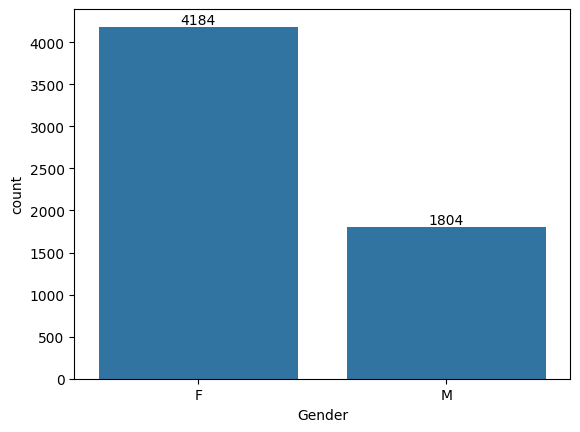

In [ ]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

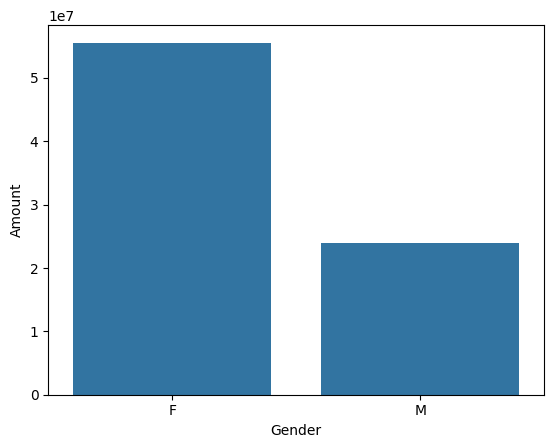

In [ ]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men


## Age

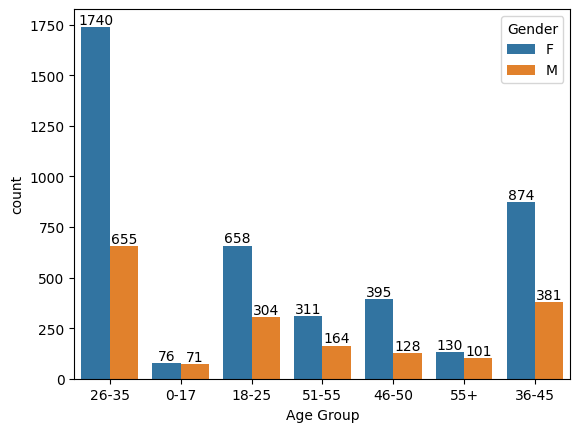

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

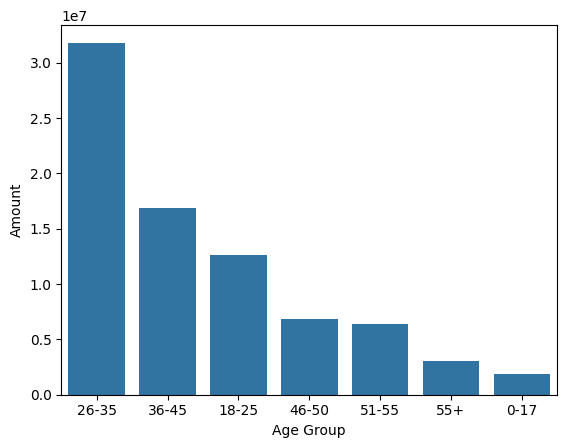

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*



# State

<Axes: xlabel='State', ylabel='Orders'>

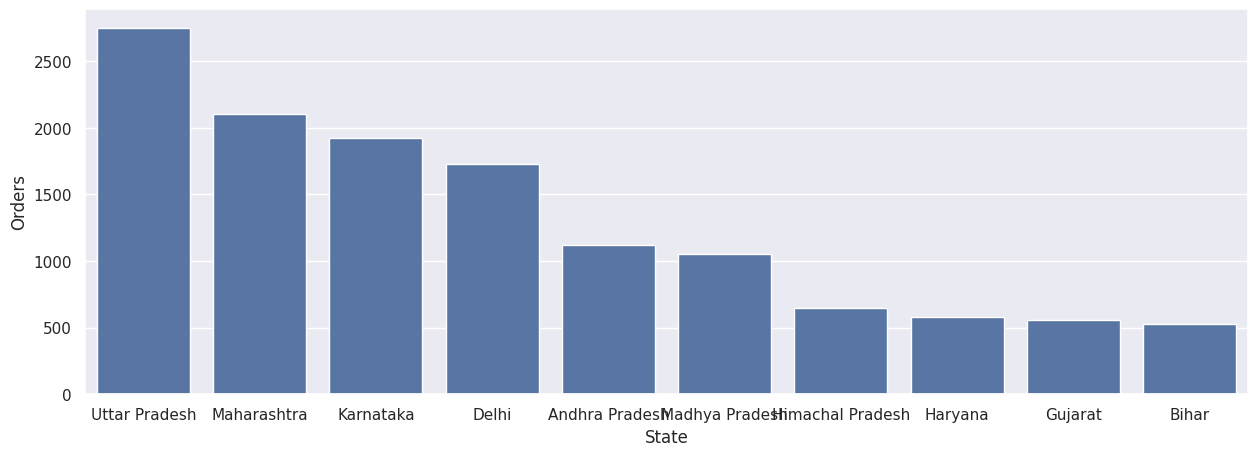

In [ ]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

*From aboe graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

# Marital Status

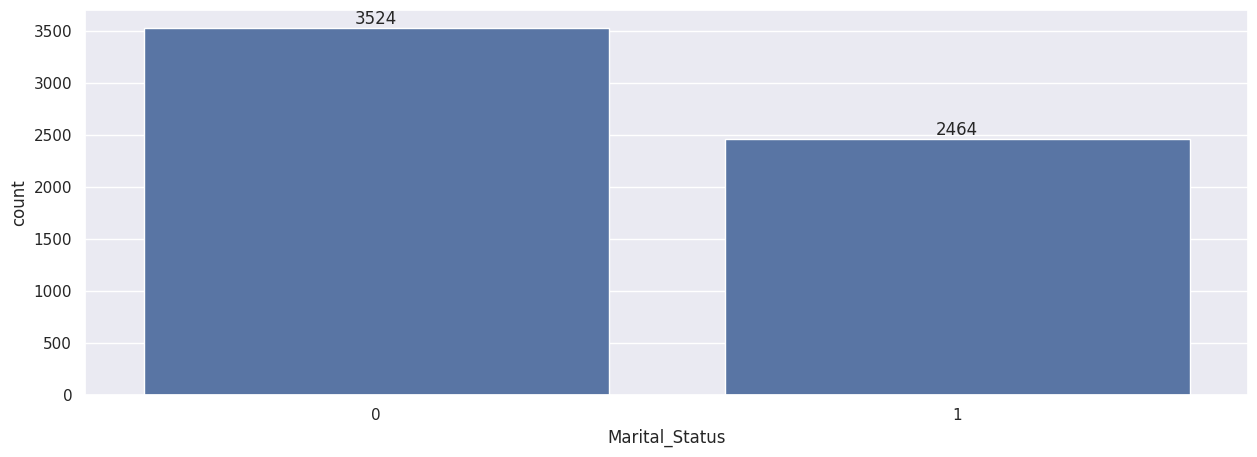

In [ ]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

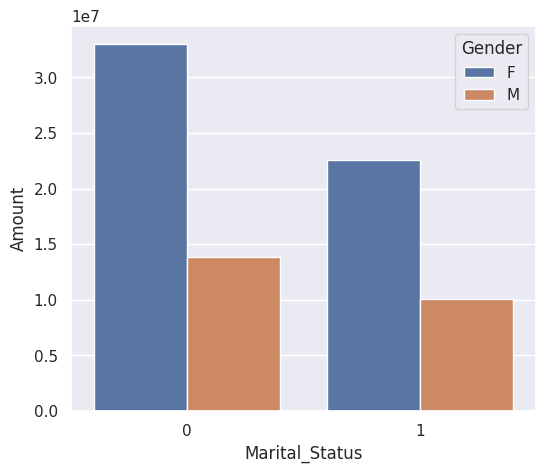

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power *

# Occupation

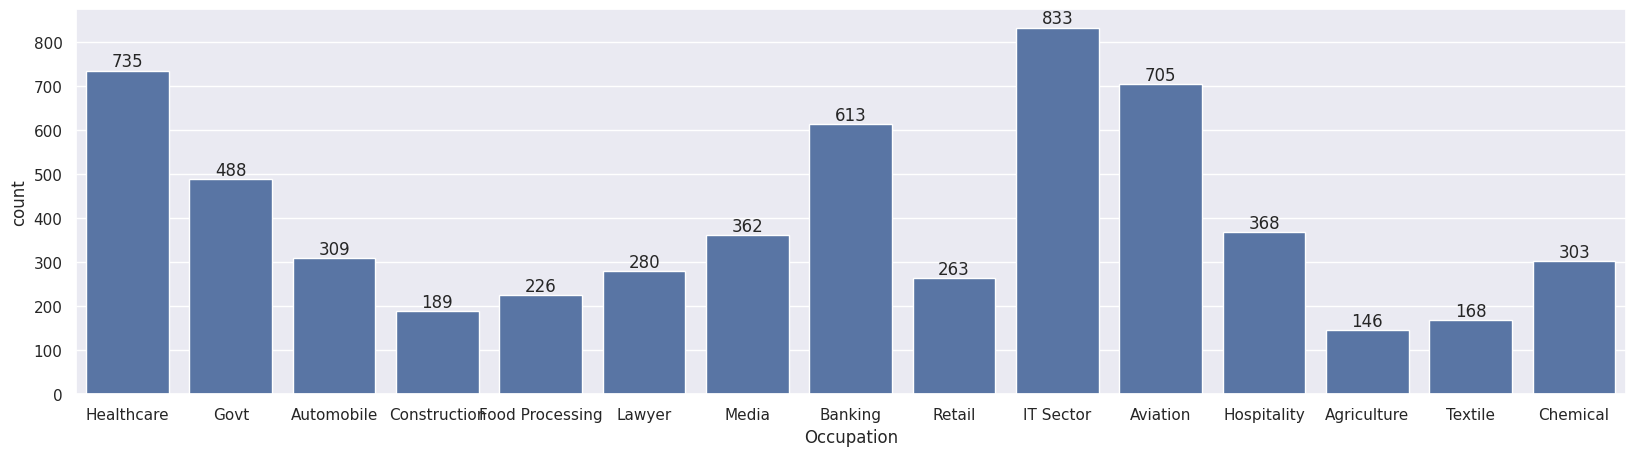

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

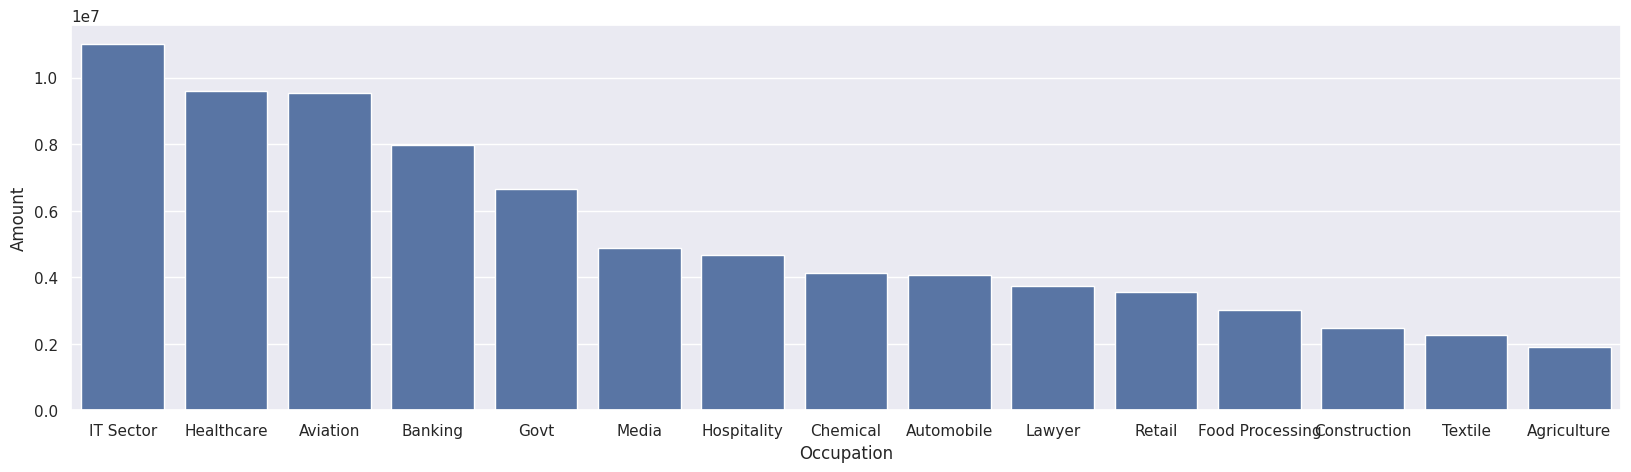

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

<Axes: xlabel='Product_Category', ylabel='Orders'>

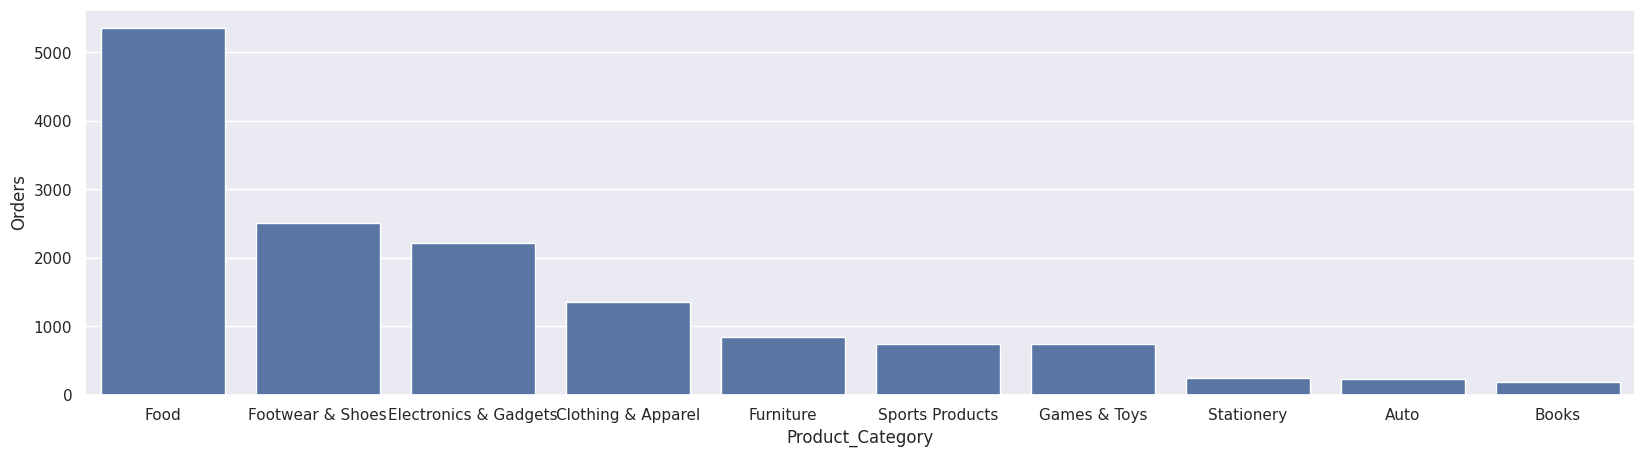

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Orders')


<Axes: xlabel='Product_Category'>

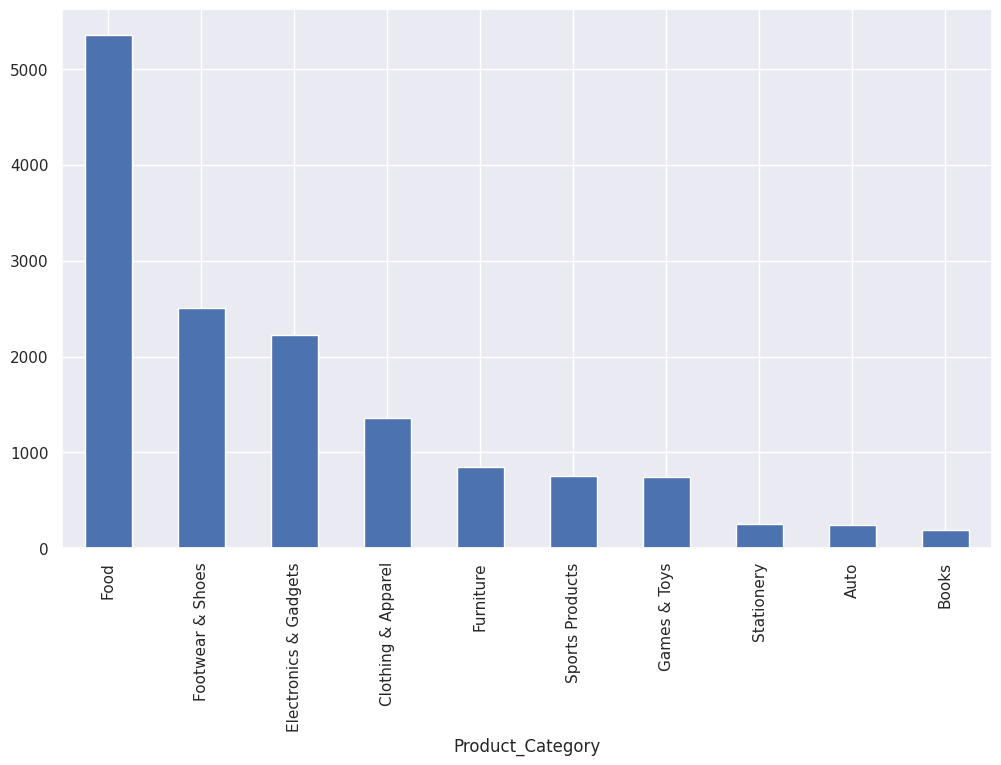

In [ ]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_Category')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


Histograms for Numerical Variables (Age and Orders):

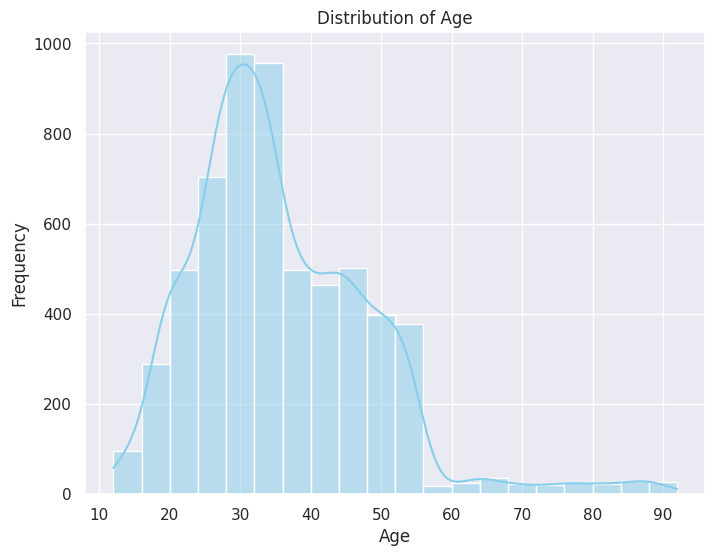

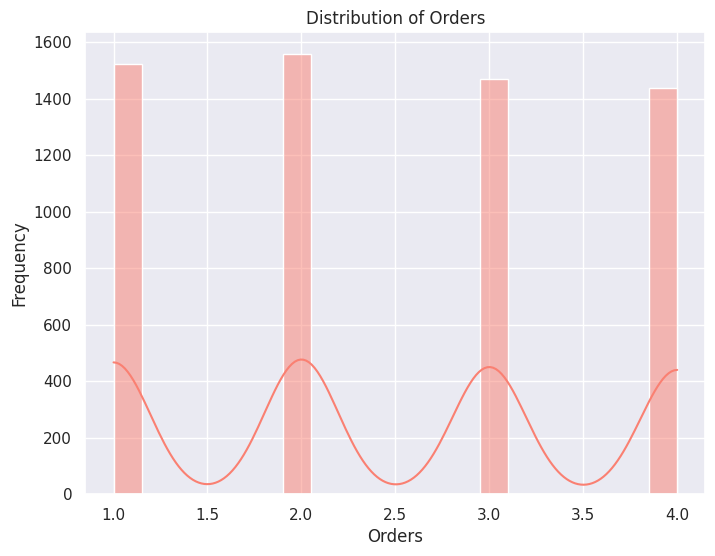

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Orders
plt.figure(figsize=(8, 6))
sns.histplot(df['Orders'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()


Box plot for Age and Orders by Occupation

<ipython-input-29-8aadbe59f31c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Age', data=df, palette='pastel')


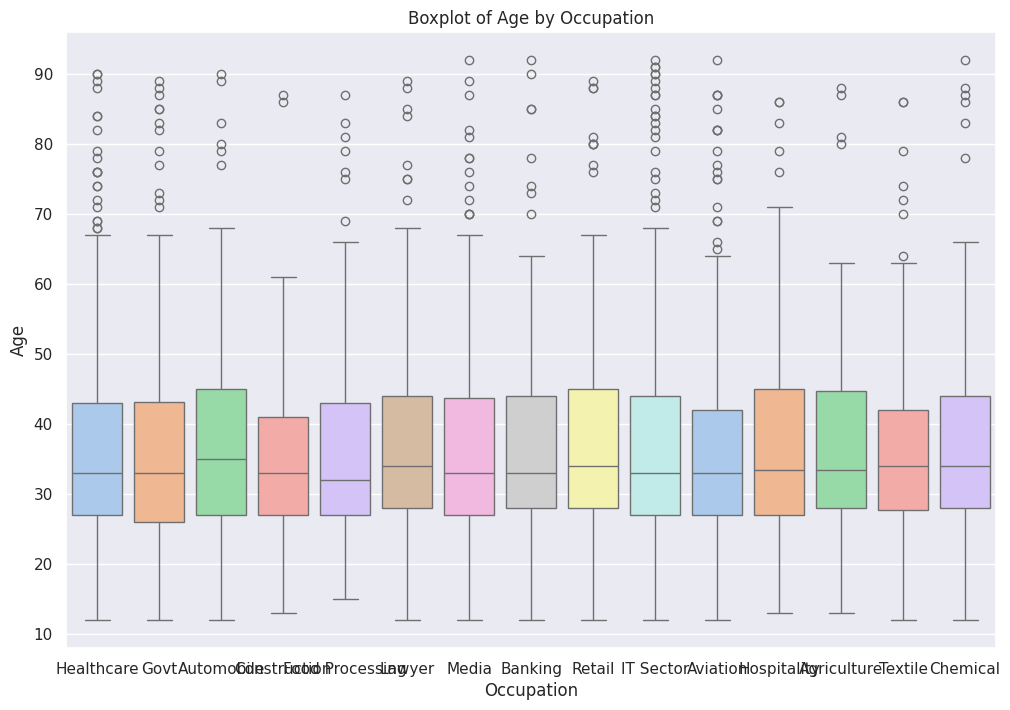

<ipython-input-29-8aadbe59f31c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Orders', data=df, palette='pastel')


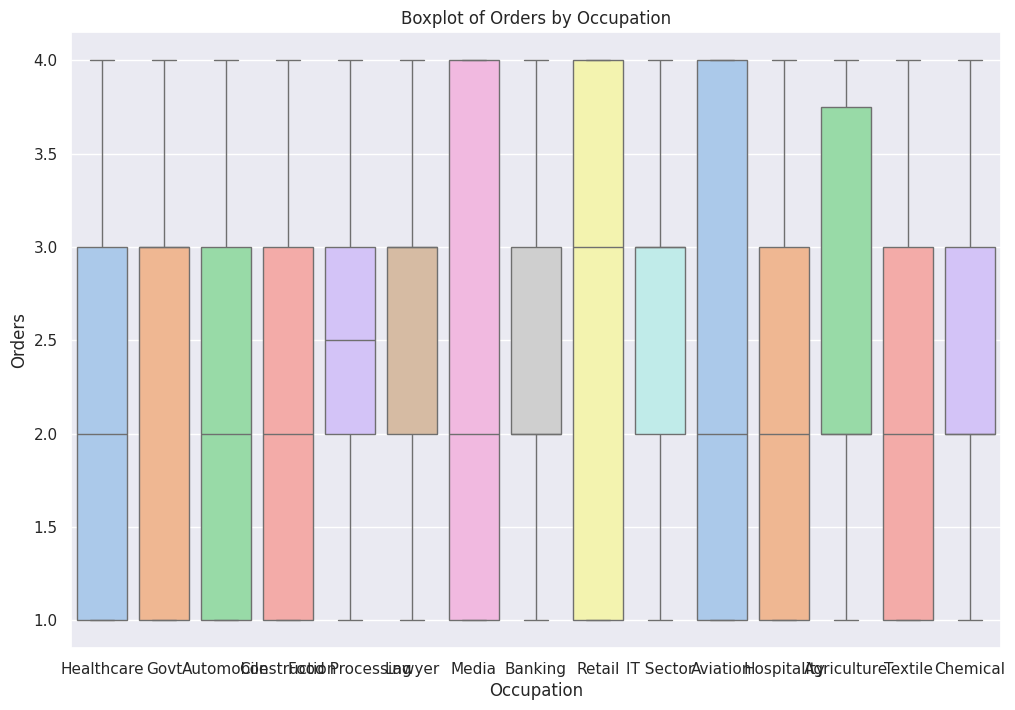

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Age', data=df, palette='pastel')
plt.title('Boxplot of Age by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Orders', data=df, palette='pastel')
plt.title('Boxplot of Orders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Orders')
plt.show()


Bar Plot for Product Category Frequency:

<ipython-input-30-338db704c142>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category', data=df, palette='Set2')


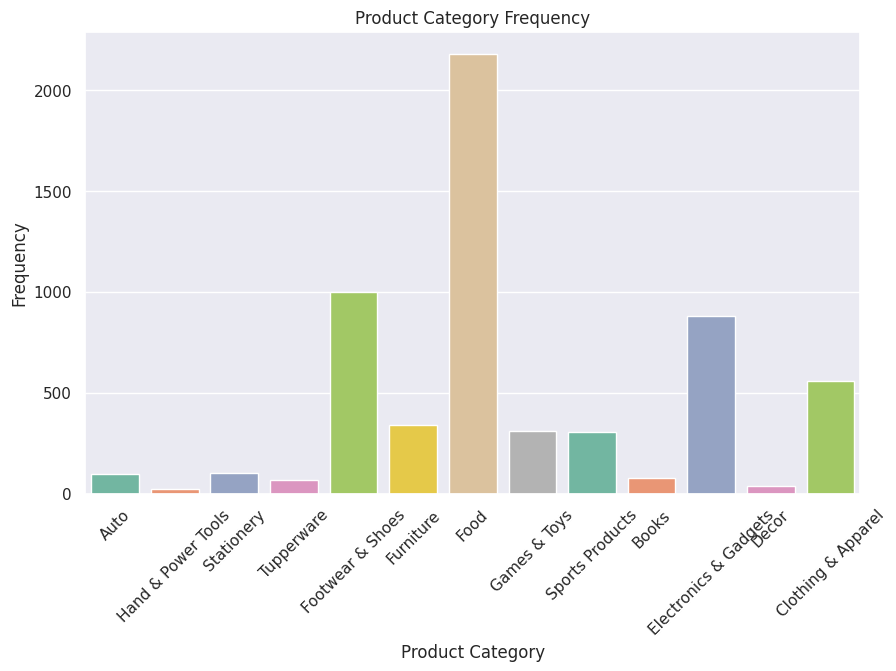

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', data=df, palette='Set2')
plt.title('Product Category Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Scatter Plot for Age vs Amount:

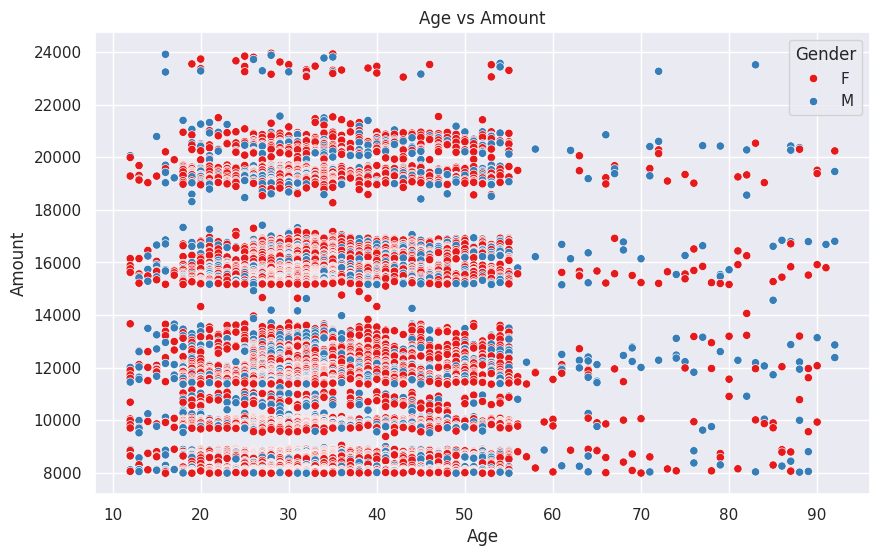

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Amount', data=df, hue='Gender', palette='Set1')
plt.title('Age vs Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()


Model Train

In [ ]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/Festival Sales rk.csv', encoding='latin1')

# Define the features and target variable
X = df[['Quantity Sold', 'Unit Price', 'Customer Age']]
y = df['Total Sales']

# Check for missing values in the target variable
missing_values = y.isnull().sum()
if missing_values > 0:
    # Option 1: Drop rows with missing values
    # X = X.dropna()
    # y = y.dropna()

    # Option 2: Impute missing values
    imputer = SimpleImputer(strategy='mean')
    y = imputer.fit_transform(y.values.reshape(-1, 1))

# Train the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()
model.fit(X, y)

# ... (rest of the code)

# Function to take vendor input and make predictions
def predict_sales(quantity_sold, unit_price, customer_age):
    input_data = [[quantity_sold, unit_price, customer_age]]
    predicted_sales = model.predict(input_data)
    return predicted_sales[0]

# Get input from the vendor
quantity_sold = int(input("Enter the quantity_sold: "))
unit_price = float(input("Enter the unit_price: "))
customer_age = int(input("Enter the customer_age: "))

# Make predictions based on the vendor input
predicted_sales = predict_sales(quantity_sold, unit_price, customer_age)
print(f"Predicted total sales: {predicted_sales}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Enter the quantity_sold: 23
Enter the unit_price: 234
Enter the customer_age: 19
Predicted total sales: 2355.101591832417


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

# Assume X is your feature matrix and y is your target variable (sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize and train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 5.6670774773892445


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 111.58840663967277


In [ ]:
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 10.563541387227712


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


R-squared (R²): 0.9998350266872809


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
print(f'Mean Cross-Validated MSE: {mean_cv_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean Cross-Validated MSE: 152.18325771053995


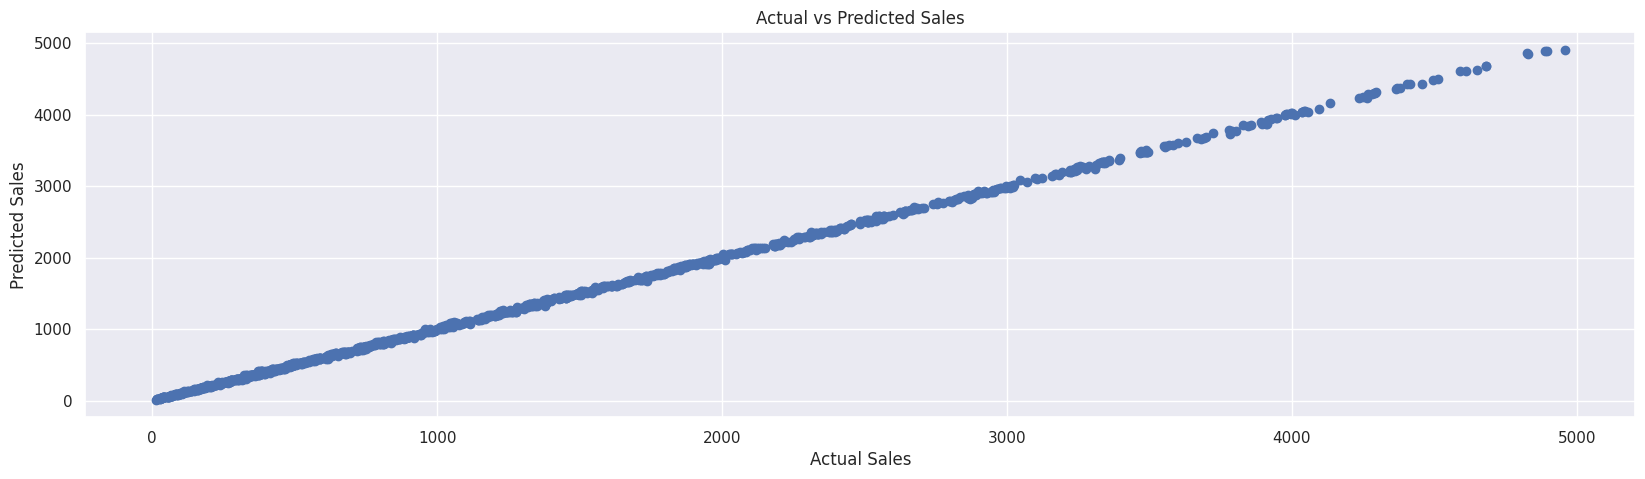

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


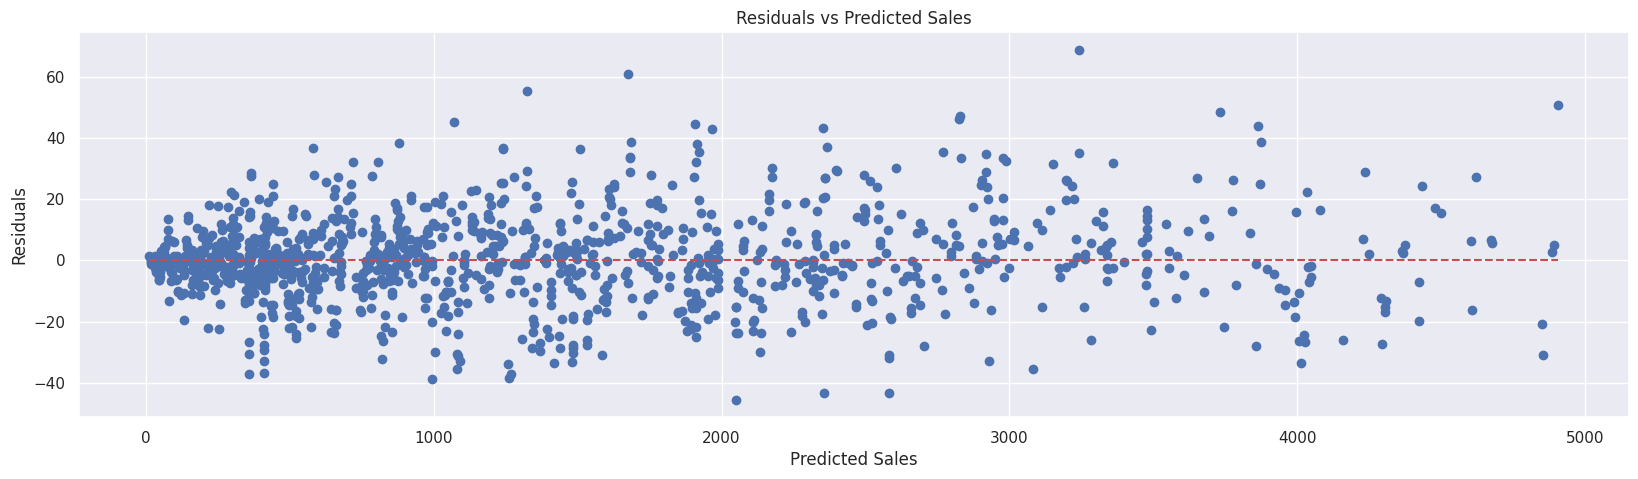

In [ ]:
residuals = y_test.ravel() - y_pred.ravel()

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.show()